In [1]:
import dynamo as dyn
import numpy as np

In [2]:
adata = dyn.read('./data/endocrinogenesis_day15_2.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 27998 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances'

In [3]:
adata = dyn.sample_data.pancreatic_endocrinogenesis()
adata

AnnData object with n_obs × n_vars = 3696 × 27998 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [4]:
pancreas_genes = ['Neurog3', 'Pax4', 'Pax6', 'Neurod1', 'Arx', 'Pdx1']

In [5]:
var_genes=adata.var.index[np.array(adata.var['highly_variable_genes'])=='True']
var_genes

Index(['Sntg1', 'Tcf24', 'Cops5', 'Sbspon', 'Pkhd1', 'Mcm3', 'Ogfrl1',
       'Fam135a', 'Adgrb3', 'Gm9898',
       ...
       'Map3k15', 'Rai2', 'Ap1s2', 'Tmem27', 'Ace2', 'Figf', 'Fancb', 'Ddx3y',
       'Eif2s3y', 'Erdr1'],
      dtype='object', name='index', length=4004)

In [6]:
var_genes.intersection(pancreas_genes)

Index(['Neurog3', 'Neurod1', 'Pax6', 'Pdx1', 'Pax4', 'Arx'], dtype='object')

In [7]:
dyn.pp.recipe_monocle(adata, keep_filtered_genes=False, keep_filtered_cells=False, genes_to_use=var_genes)

D:\Yan\Xing Lab\dynamo-release\dynamo\preprocessing\utils.py:439: UserWarning: `total_szfactor` is not `None` and it is not in adata object.
  warnings.warn("`total_szfactor` is not `None` and it is not in adata object.")


AnnData object with n_obs × n_vars = 3696 × 4004 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X_umap', 'X', 'cell_cycle_scores'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

In [8]:
dyn.tl.dynamics(adata, model='stochastic', cores=3)

D:\Yan\Xing Lab\dynamo-release\dynamo\tools\utils.py:939: RuntimeWarning: divide by zero encountered in true_divide
  adata.var.loc[valid_ind, kin_param_pre + "half_life"] = None if gamma is None else np.log(2) / gamma


AnnData object with n_obs × n_vars = 3696 × 4004 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X_umap', 'X', 'cell_cycle_scores'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

<Figure size 600x400 with 0 Axes>

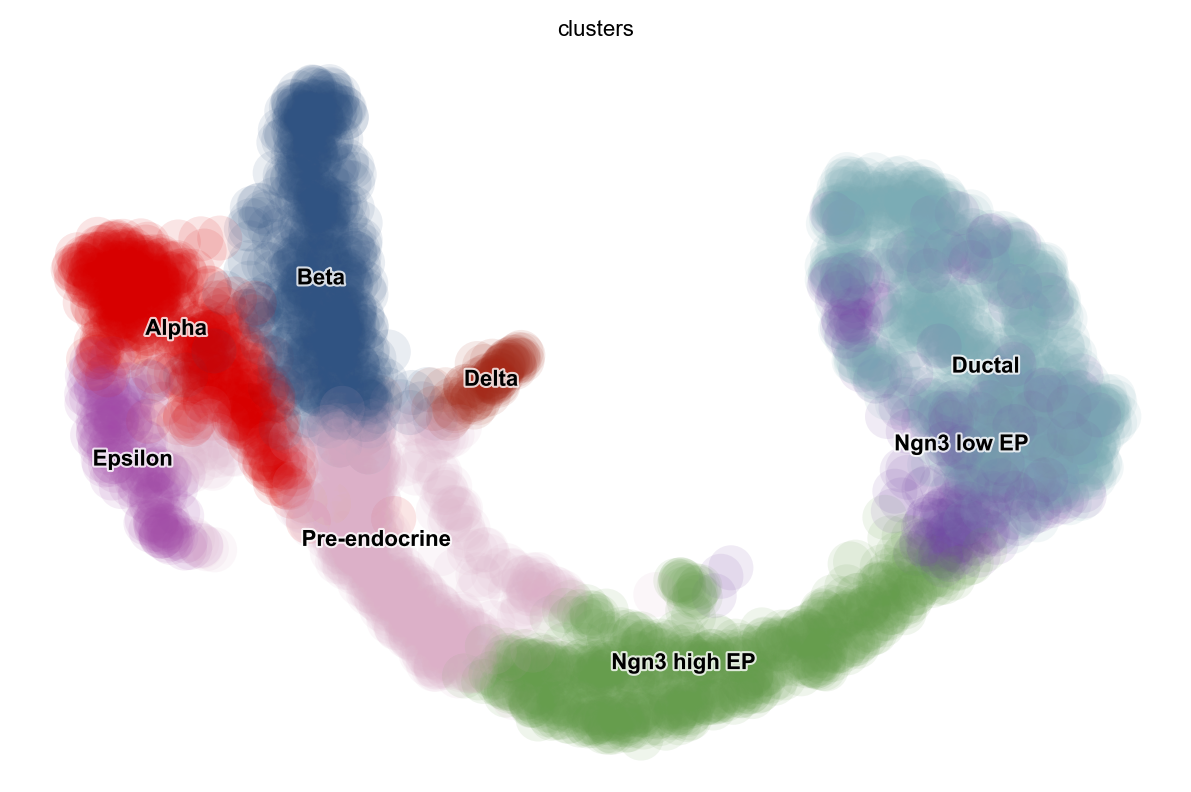

In [11]:
adata.obsm['X_scv'] = adata.obsm['X_umap']
del adata.obsm['X_umap']
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color='clusters')

projecting velocity vector to low dimensional embedding...:  12%|██               | 446/3696 [00:00<00:00, 4426.43it/s]

Using existing pearson_transition_matrix found in .obsp.


projecting velocity vector to low dimensional embedding...: 100%|████████████████| 3696/3696 [00:00<00:00, 4314.24it/s]


<Figure size 600x400 with 0 Axes>

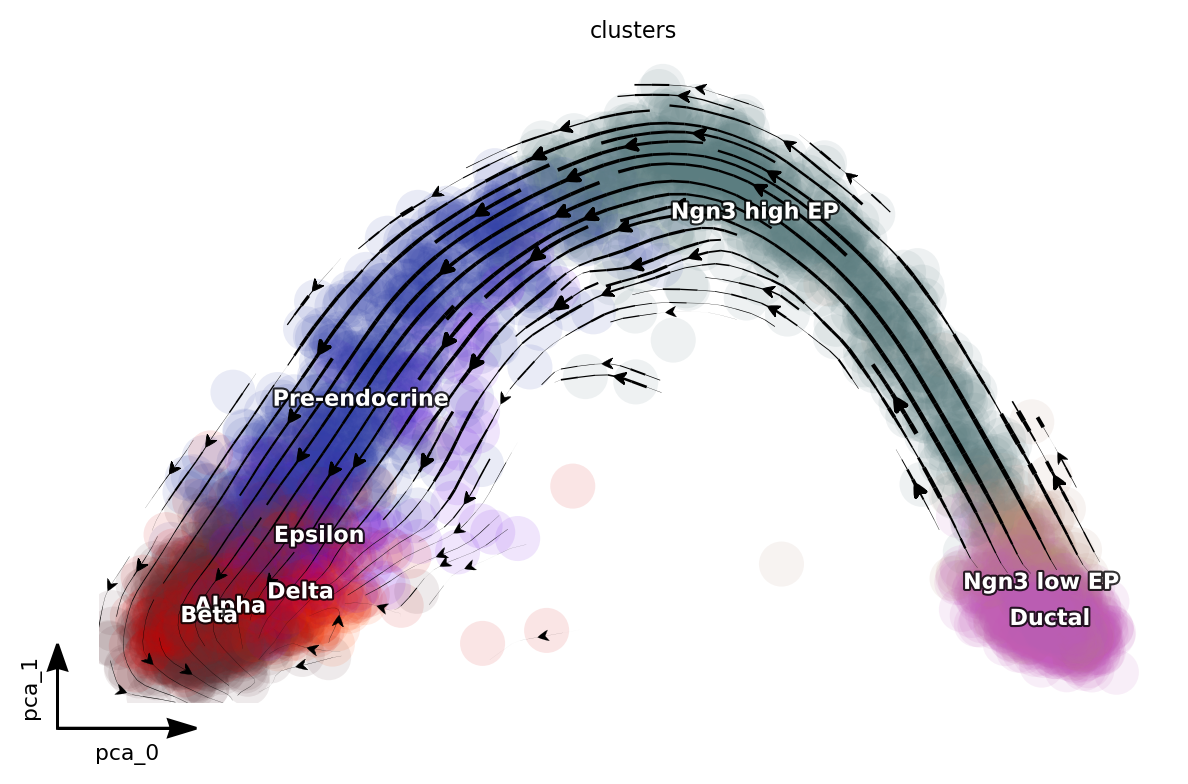

In [24]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='pca', show_legend='on data', show_arrowed_spines=True)

projecting velocity vector to low dimensional embedding...:  13%|██▏              | 465/3696 [00:00<00:00, 4616.28it/s]

Using existing pearson_transition_matrix found in .obsp.


projecting velocity vector to low dimensional embedding...: 100%|████████████████| 3696/3696 [00:00<00:00, 4558.28it/s]


<Figure size 600x400 with 0 Axes>

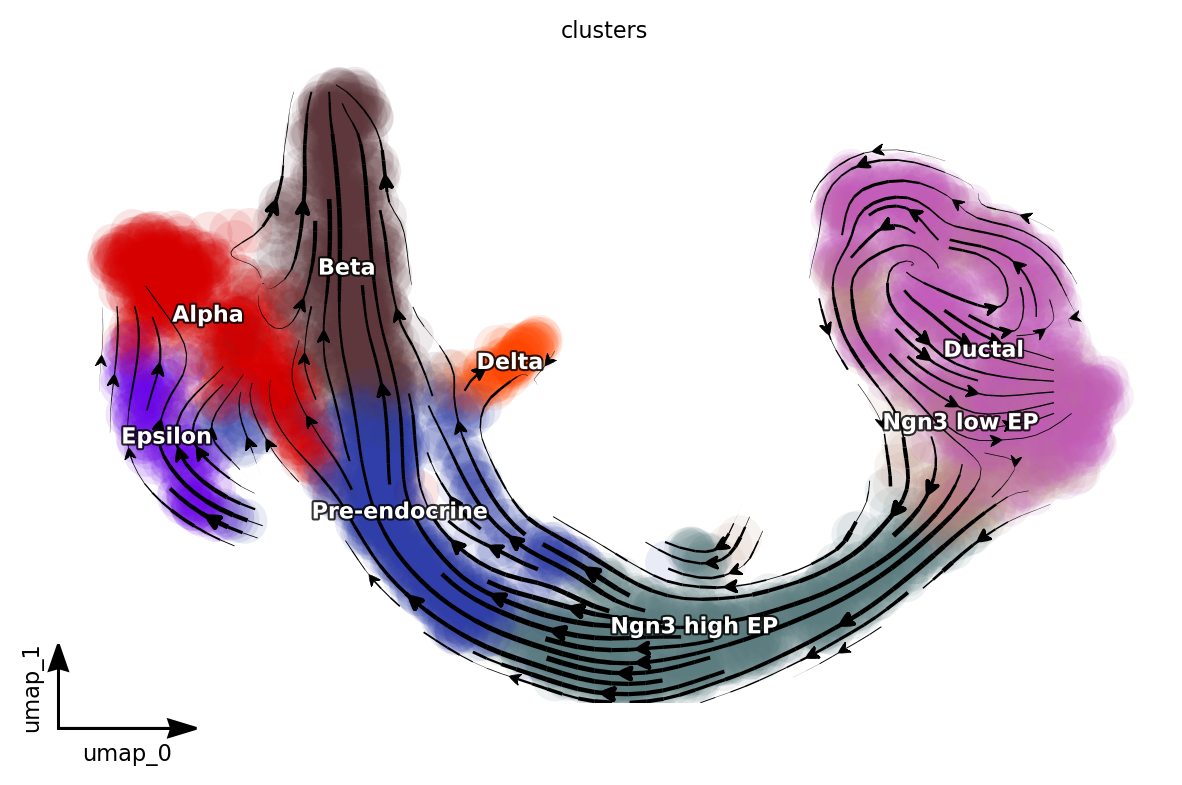

In [23]:
dyn.tl.cell_velocities(adata)
dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', show_legend='on data', show_arrowed_spines=True)

projecting velocity vector to low dimensional embedding...:  28%|████▍           | 1028/3696 [00:00<00:00, 5097.74it/s]

Using existing pearson_transition_matrix found in .obsp.


projecting velocity vector to low dimensional embedding...: 100%|████████████████| 3696/3696 [00:00<00:00, 5001.00it/s]


<Figure size 600x400 with 0 Axes>

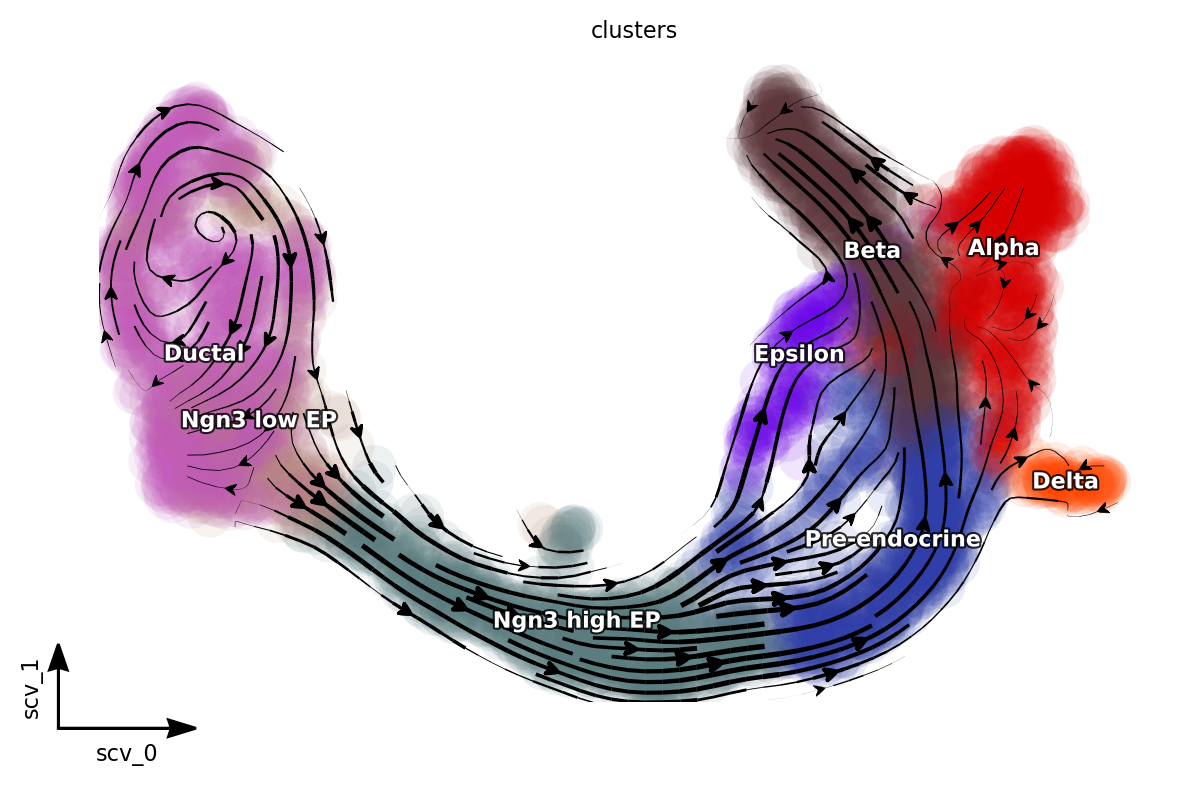

In [25]:
dyn.tl.cell_velocities(adata, basis='scv')
dyn.pl.streamline_plot(adata, color=['clusters'], basis='scv', show_legend='on data', show_arrowed_spines=True)

In [26]:
dyn.cleanup(adata)

AnnData object with n_obs × n_vars = 3696 × 4004 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'umap_fit', 'grid_velocity_umap', 'grid_velocity_pca', 'grid_velocity_scv'
    obsm: 'X_pca', 'X', 'cell_cycle_scores', 'X_scv', 'X_umap', 'velocity_umap', 'velocity_pca', 'velocity_scv'
    lay

In [27]:
adata.write('./data/Pancreas/pancreatic_endocrinogenesis_g%d_dyn.h5ad'%adata.n_vars)

... storing 'beta' as categorical
... storing 'gamma' as categorical
... storing 'half_life' as categorical
... storing 'alpha_b' as categorical
... storing 'alpha_r2' as categorical
... storing 'gamma_b' as categorical
... storing 'gamma_r2' as categorical
... storing 'gamma_logLL' as categorical
... storing 'delta_b' as categorical
... storing 'delta_r2' as categorical
... storing 'uu0' as categorical
... storing 'ul0' as categorical
... storing 'su0' as categorical
... storing 'sl0' as categorical
... storing 'U0' as categorical
... storing 'S0' as categorical
... storing 'total0' as categorical
